In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
path_to_file = './sat_scores.csv'

In [3]:
with open (path_to_file, 'r') as file:
    rows = [lines for lines in csv.reader(file)]

header = rows[0]

sat_score = {}
for idx in range(len(header)):
    values = [row[idx] for row in rows[1:]]
    sat_score[header[idx]] = values

In [4]:
sat_score;

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_score_csv = pd.DataFrame(sat_score)
sat_score_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     object
 2   Verbal  52 non-null     object
 3   Math    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [6]:
# reading in integer dtype as object.

In [7]:
# read in with Pandas
# data is read in correctly as integer with Pandas
sat_df = pd.read_csv(path_to_file)
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [8]:
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat_df.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [10]:
# The last row looks suspescious. 
# I do not know much about US so I imported US and state metadata package to examine. 

import us
for state in list(sat_df['State']):
    print(f"{state}: {us.states.lookup(state)}")

CT: Connecticut
NJ: New Jersey
MA: Massachusetts
NY: New York
NH: New Hampshire
RI: Rhode Island
PA: Pennsylvania
VT: Vermont
ME: Maine
VA: Virginia
DE: Delaware
MD: Maryland
NC: North Carolina
GA: Georgia
IN: Indiana
SC: South Carolina
DC: District of Columbia
OR: Oregon
FL: Florida
WA: Washington
TX: Texas
HI: Hawaii
AK: Alaska
CA: California
AZ: Arizona
NV: Nevada
CO: Colorado
OH: Ohio
MT: Montana
WV: West Virginia
ID: Idaho
TN: Tennessee
NM: New Mexico
IL: Illinois
KY: Kentucky
WY: Wyoming
MI: Michigan
MN: Minnesota
KS: Kansas
AL: Alabama
NE: Nebraska
OK: Oklahoma
MO: Missouri
LA: Louisiana
WI: Wisconsin
AR: Arkansas
UT: Utah
IA: Iowa
SD: South Dakota
ND: North Dakota
MS: Mississippi
All: None


In [11]:
# The last row is not actually an US state. 
# Google suggested that US has 50 states and Washington DC.
# The dataset should expect 51 entries.

sat_df = sat_df.iloc[:51,:]

In [12]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [13]:
sat_df.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
data_dist = {
    'State': {
        'description': 'US State ID',
        'datatype': 'string'
    },
    'Rate': {
        'description': 'Percent of students who took SAT',
        'datatype': 'int64'
    },
    'Verbal': {
        'description': 'Average score on reading and wrting in SAT',
        'datatype': 'int64'
    },
    'Math': {
        'description': 'Average score on math in SAT',
        'datatype': 'int64'
    },
    'dataset_shape': (51,4)
}

In [15]:
data_dist

{'State': {'description': 'US State ID', 'datatype': 'string'},
 'Rate': {'description': 'Percent of students who took SAT',
  'datatype': 'int64'},
 'Verbal': {'description': 'Average score on reading and wrting in SAT',
  'datatype': 'int64'},
 'Math': {'description': 'Average score on math in SAT', 'datatype': 'int64'},
 'dataset_shape': (51, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [16]:
# import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('seaborn-colorblind')

In [17]:
# sns.distplot is outdated in my python version. 
# kde = False essentially means the plot is histgram.
# below will use seaborn's histplot for this question.

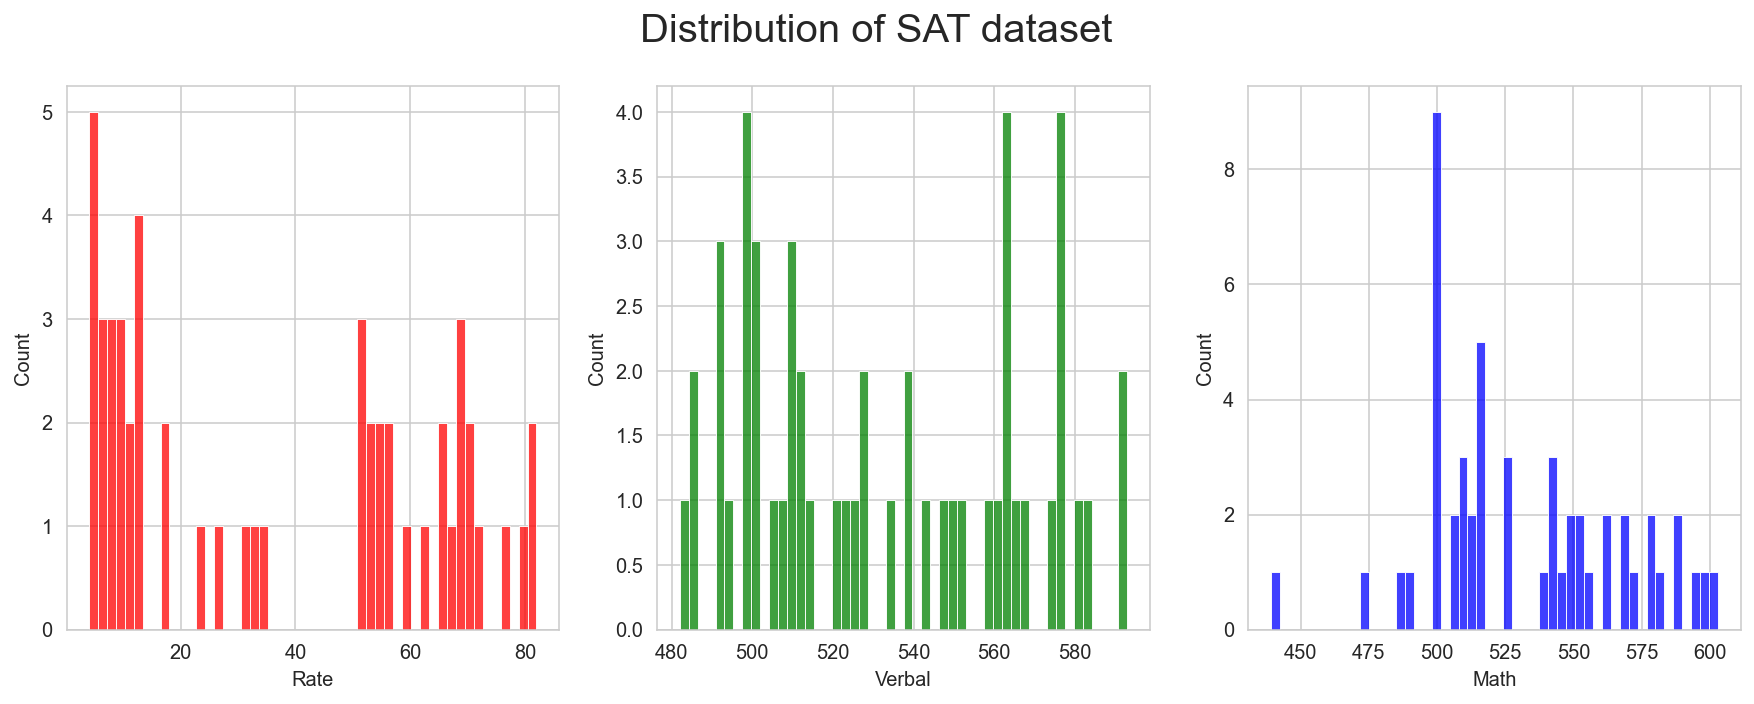

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,5));
fig.suptitle('Distribution of SAT dataset',fontsize = 20)

sns.histplot(sat_df['Rate'],bins = 50, color = 'red', ax=axes[0])
sns.histplot(sat_df['Verbal'],bins = 50, color = 'green', ax=axes[1])
sns.histplot(sat_df['Math'],bins = 50, color = 'blue', ax=axes[2]);

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

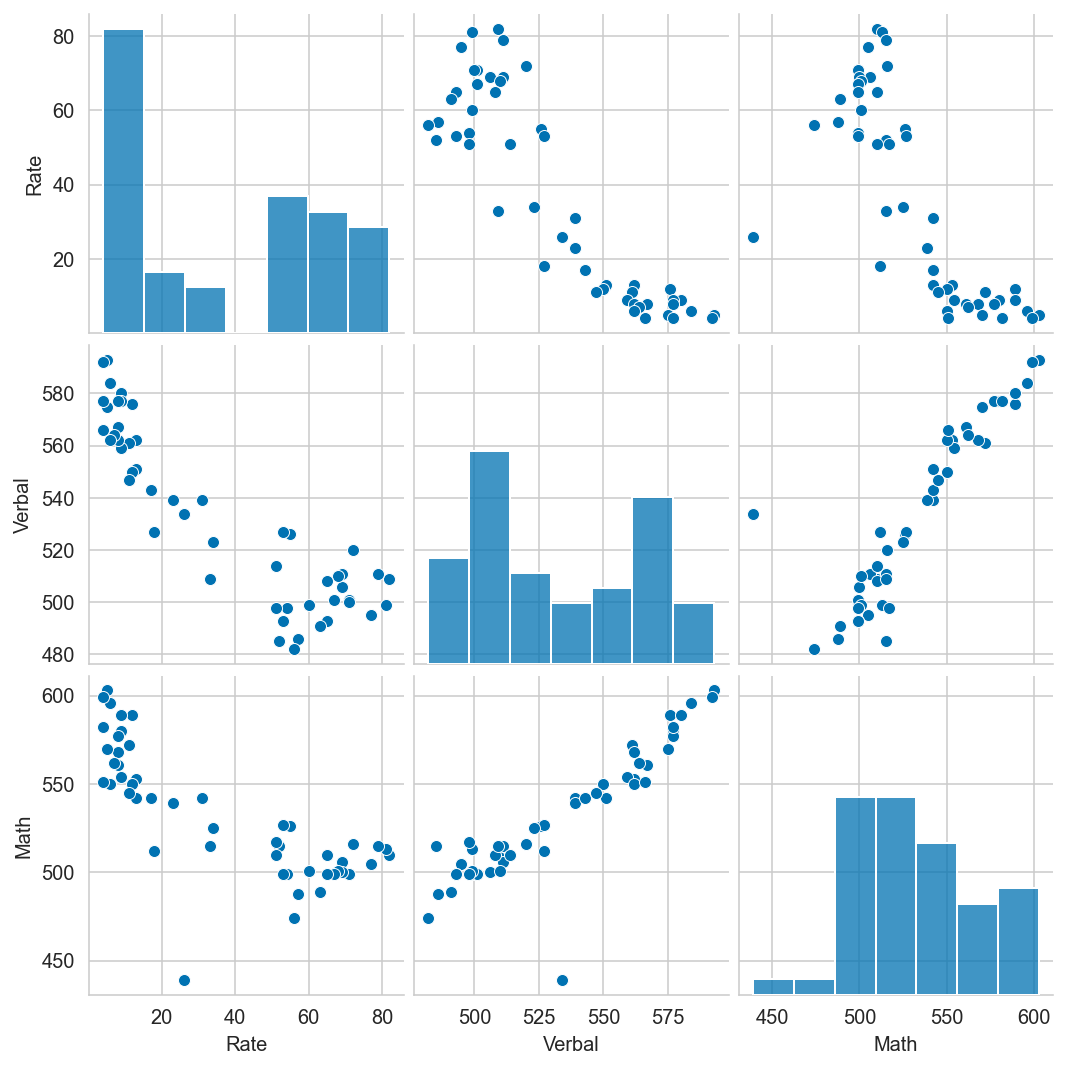

In [19]:
sns.pairplot(sat_df);

In [20]:
# finding:
# 1. Verbal and Math scores have linear relationship. They form high correlation positively.
# 2. Rate shows negative correlation with both verbal and math scores in some extend.
# 3. Verbal scores seem to be bimodal distribution.
# 4. There seems to be one extreme case/outlier where verbal score is much higher than math score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

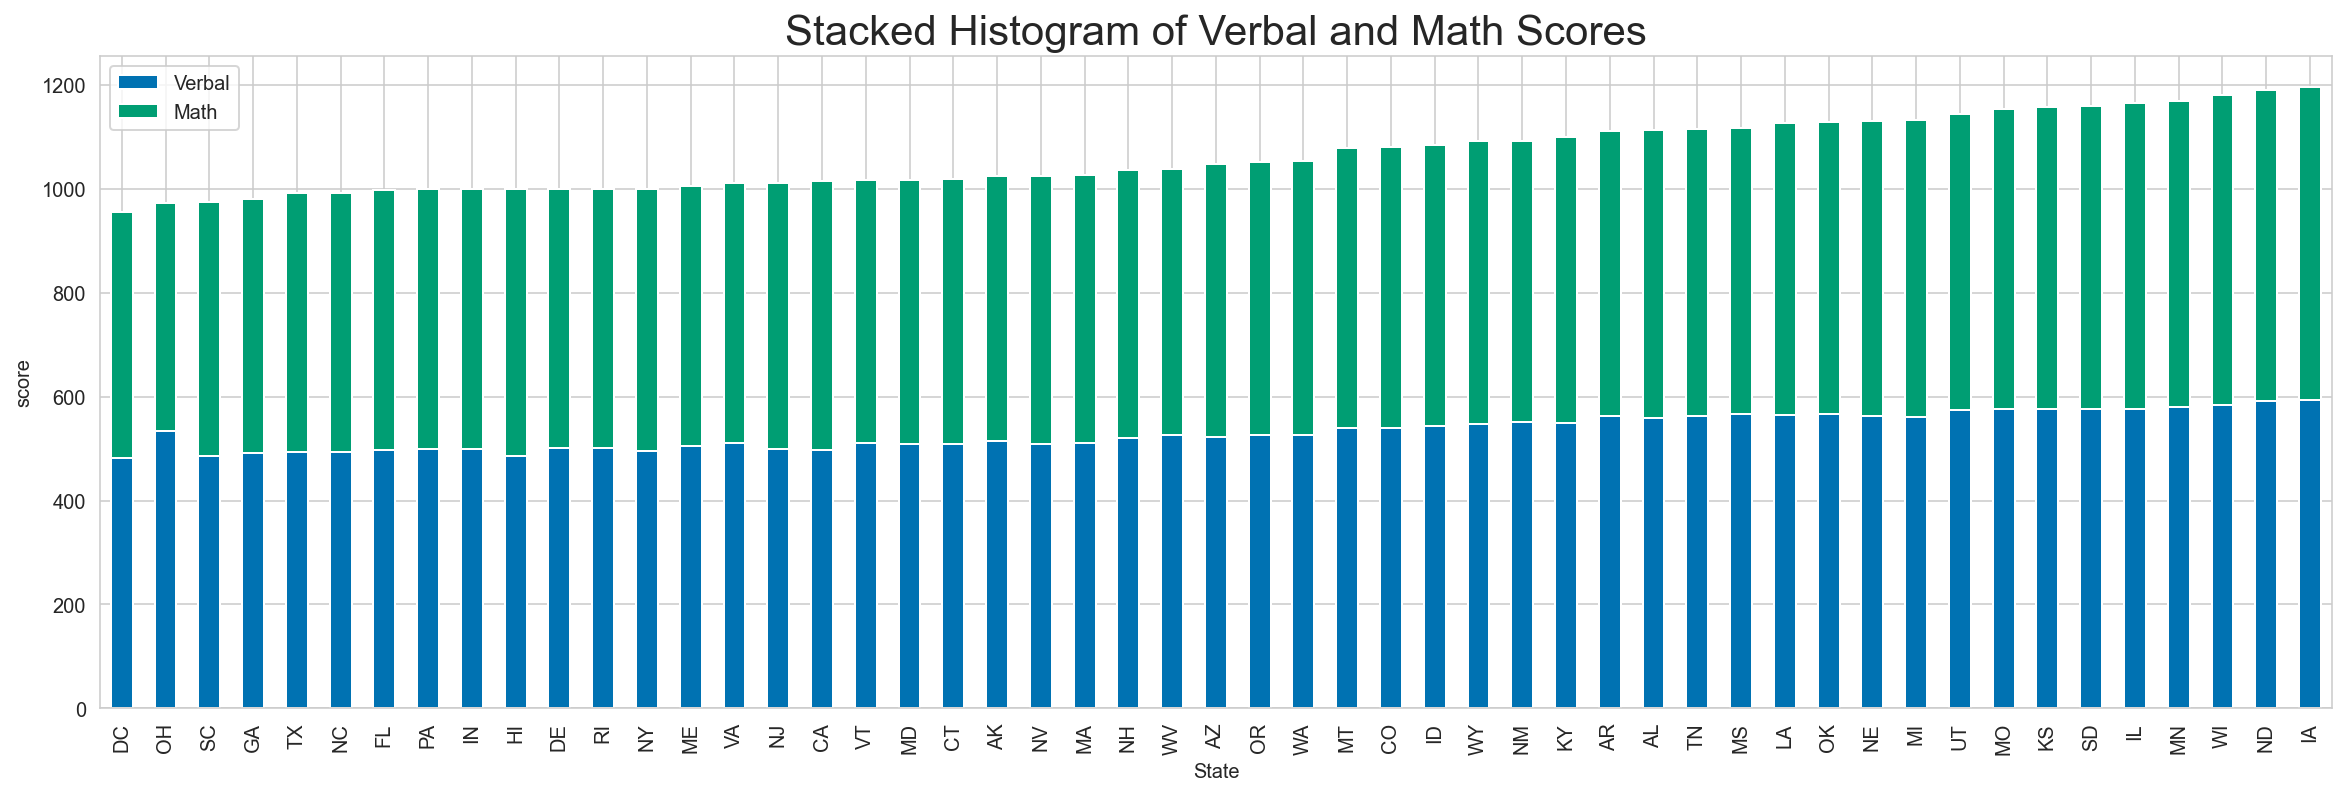

In [21]:
sat_df['Total'] = sat_df['Verbal'] + sat_df['Math']

sat_by_total = sat_df.sort_values(by = 'Total')

ax = sat_by_total.drop(columns=['Rate','Total']).plot(kind ='bar',x = 'State', stacked = True, figsize = (20,6))

ax.set_title('Stacked Histogram of Verbal and Math Scores', fontsize = 21)
ax.legend(loc = 2)
ax.set_xlabel('State')
ax.set_ylabel('score');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

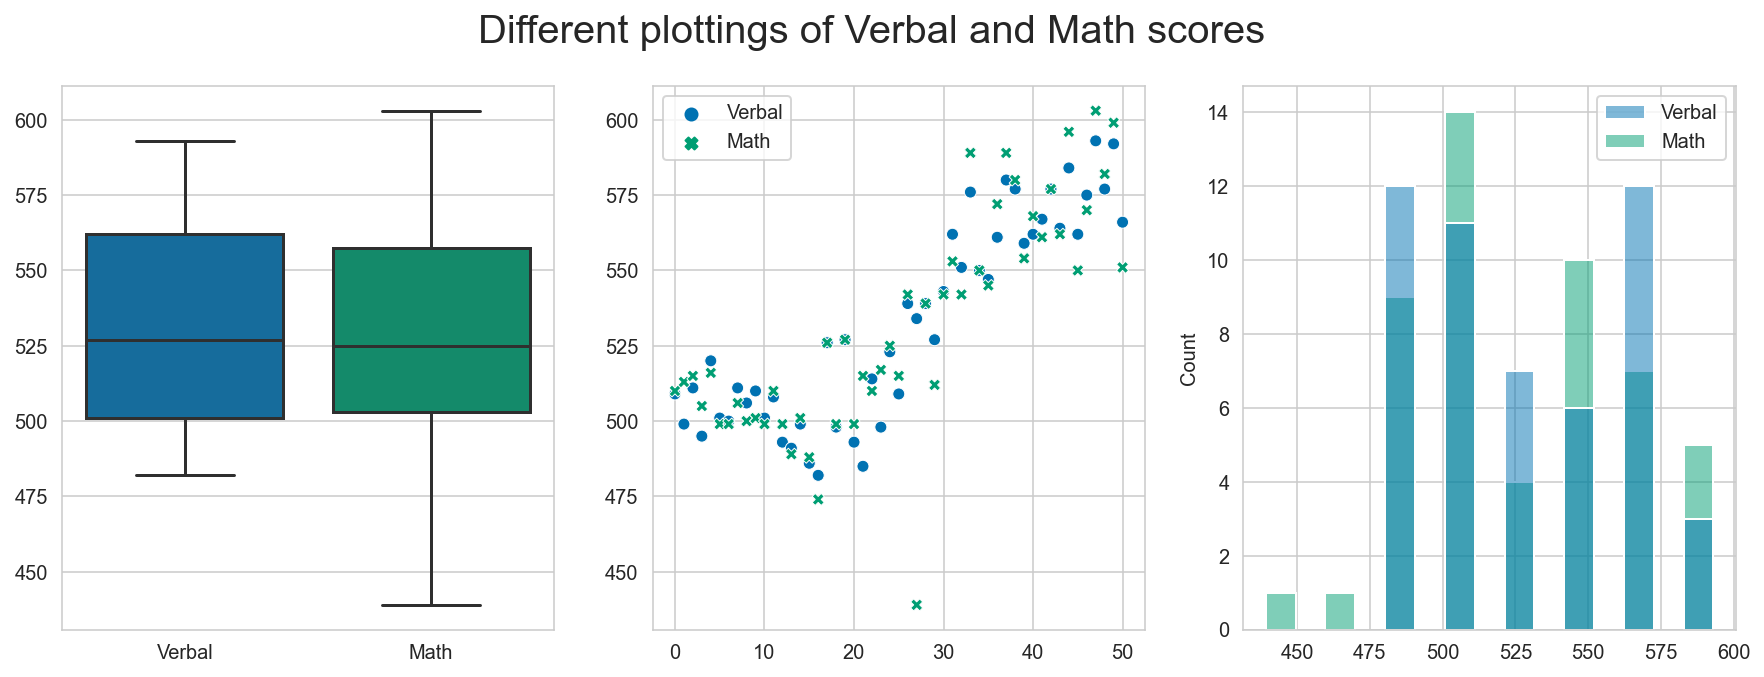

In [22]:
fig, axes = plt.subplots(1,3, figsize=(15,5));
fig.suptitle('Different plottings of Verbal and Math scores',fontsize = 20)

sns.boxplot(data = sat_df[['Verbal','Math']], ax = axes[0])
sns.scatterplot(data = sat_df[['Verbal','Math']], ax=axes[1])
sns.histplot(data = sat_df[['Verbal','Math']],alpha = 0.5, shrink = .5, ax = axes[2]);

In [23]:
# The benefits of boxplots is that we can observe below from one plot.
# 1. data distribution in the same scale
# 2. Math has larger standard deviation and wider whiskers therefore more spread out. 
# 3. Verbal and Math have very close mean value. 

In [24]:
# Rate is not in the same scale of Verbal and Math. Hence, plotting on the same chart does not help comparison. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [25]:
# standardise the variables
# NOTE: Rate in original dataset is sorted descendingly therefore the standardised dataset is descending by rate too. 
std_data = pd.DataFrame(stats.zscore(sat_df[['Rate','Verbal','Math']]), columns = ['std_rate','std_verbal','std_math'])
std_data

,std_rate,std_verbal,std_math
0,1.649606,-0.712322,-0.607938
1,1.612948,-1.015059,-0.524442
2,1.539632,-0.651775,-0.468778
3,1.466317,-1.136154,-0.747098
4,1.283027,-0.379312,-0.440946
5,1.246369,-0.954512,-0.914090
6,1.246369,-0.984785,-0.914090
7,1.173053,-0.651775,-0.719266
8,1.173053,-0.803143,-0.886258
9,1.136395,-0.682048,-0.858426


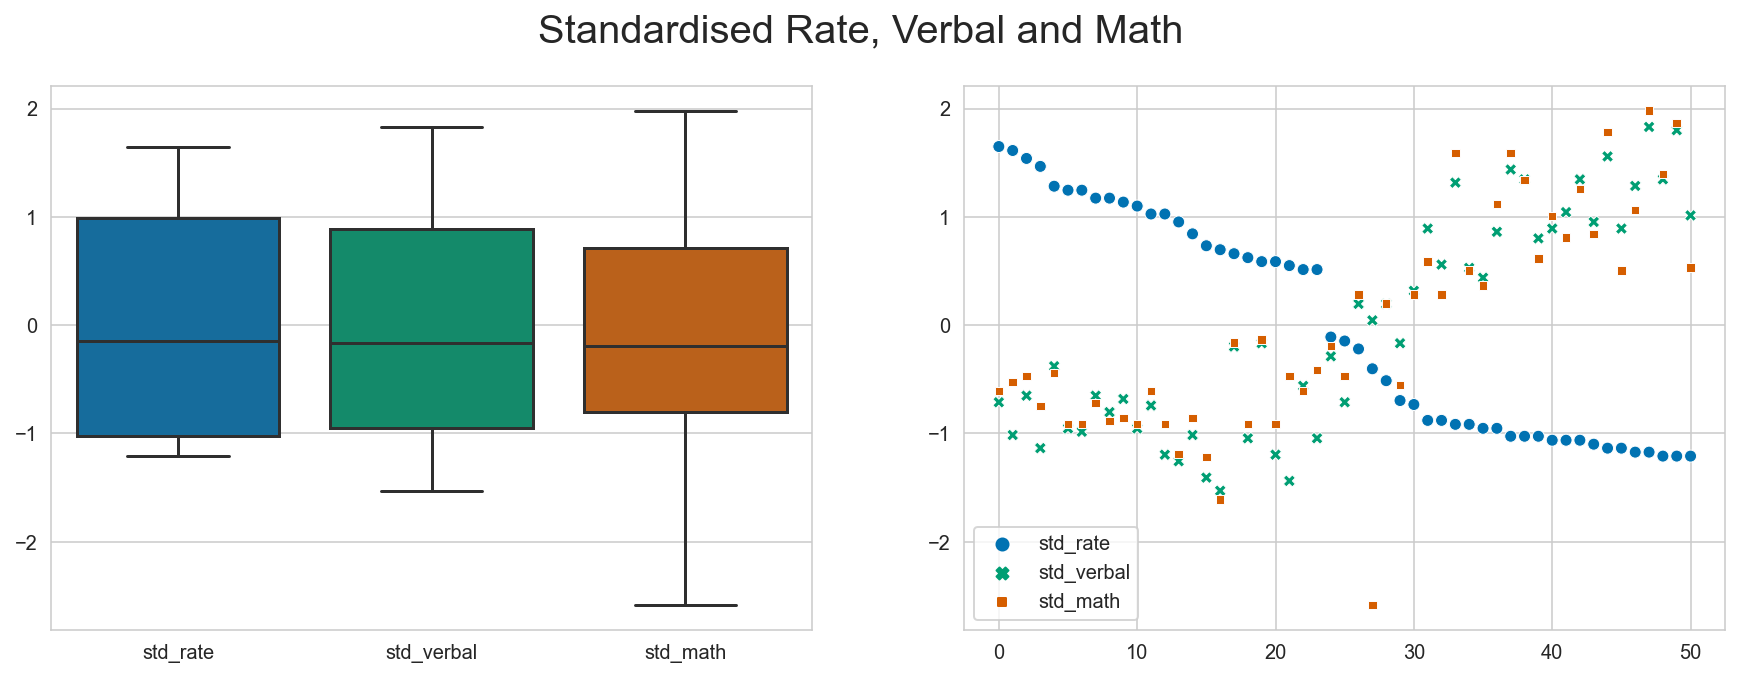

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5));
fig.suptitle('Standardised Rate, Verbal and Math',fontsize = 20)

sns.boxplot(data = std_data, ax = axes[0])  
sns.scatterplot(data = std_data, ax=axes[1]);

In [27]:
# findings:

# although it does not make more sense to me personally by putting together these 3 variables
# the boxplot of rate indicates that the distribution of participance rate is more narrow

# on the other hand, the scatter plot of standardised data implies 
# that the higher participance rate is, the lower both Verbal and Math scores become
# this could lead to an inspection of the score difference/total in relation to rate. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [28]:
verbal_above_ave = list(sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]['State'])
verbal_above_ave;

In [29]:
print(f'{len(verbal_above_ave)} states are above the average of verbal score across US.')

24 states are above the average of verbal score across US.


In [30]:
len(verbal_above_ave)/len(sat_df['Verbal'])

0.47058823529411764

In [31]:
# finding:
# verbal score seems to be evenly distributed across US states as almost half of the states are above average.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [32]:
verbal_above_median = list(sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]['State'])
verbal_above_median;

In [33]:
len(verbal_above_median)

24

In [34]:
# check if the state varies in the two lists. 
verbal_above_ave == verbal_above_median

True

In [35]:
# there is no other state lying in between mean score and median score. 

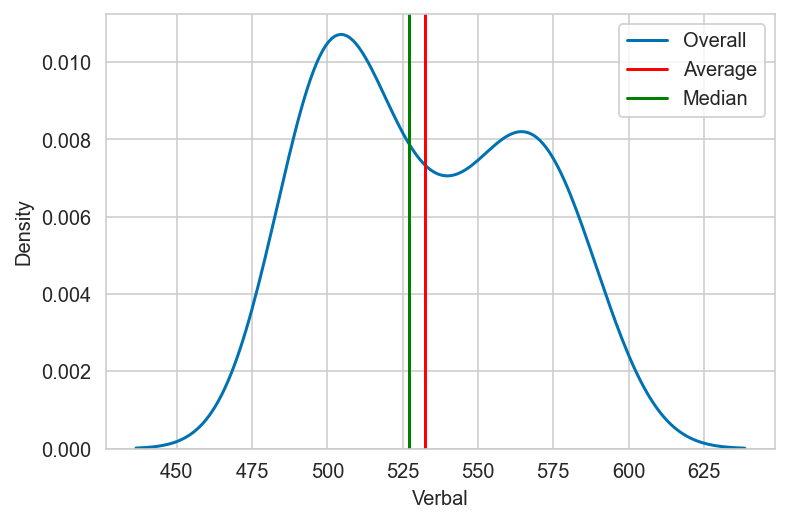

In [36]:
ax = sns.kdeplot(sat_df['Verbal'])
ax.axvline(sat_df['Verbal'].mean(), color = 'r')
ax.axvline(sat_df['Verbal'].median(), color = 'g')
ax.legend(('Overall','Average','Median'));

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [37]:
sat_df['Gap'] = sat_df['Verbal'] - sat_df['Math']
sat_df['Total'] = sat_df['Verbal'] + sat_df['Math']
sat_df.head()

,State,Rate,Verbal,Math,Total,Gap
0,CT,82,509,510,1019,-1
1,NJ,81,499,513,1012,-14
2,MA,79,511,515,1026,-4
3,NY,77,495,505,1000,-10
4,NH,72,520,516,1036,4


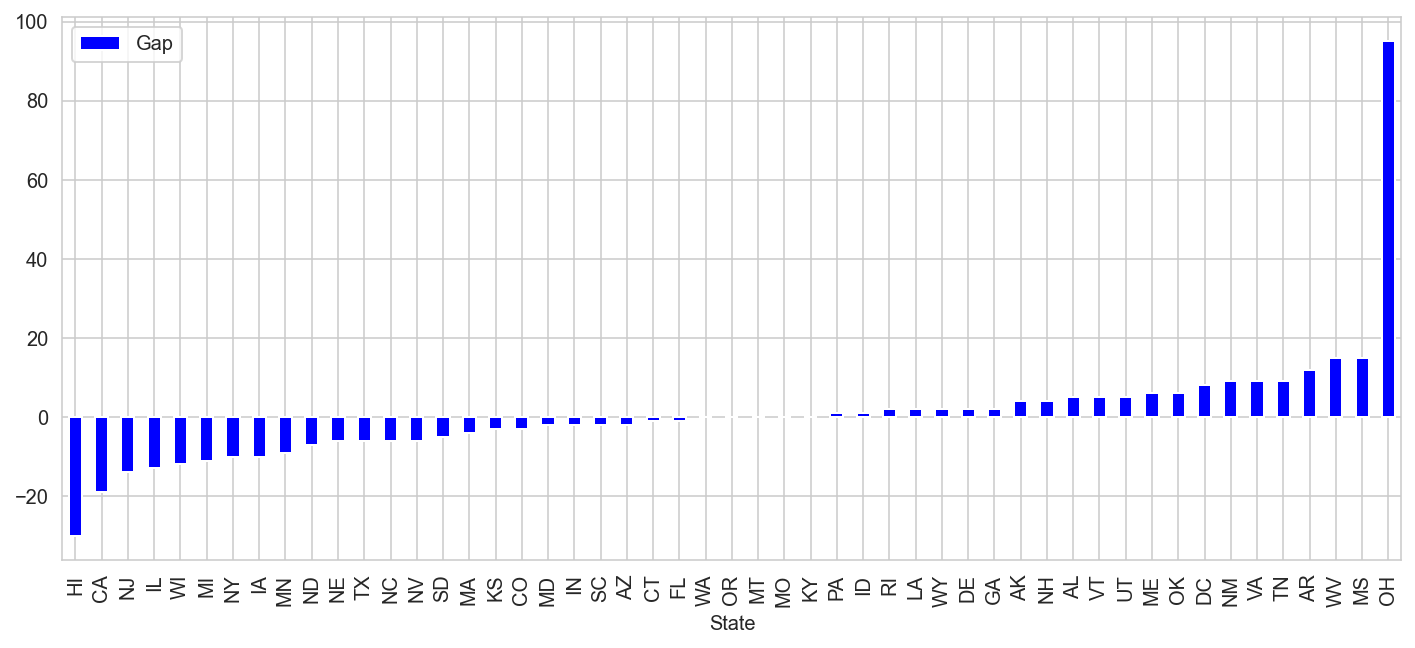

In [38]:
sat_df[['State','Gap']].sort_values('Gap').plot(kind ='bar',x = 'State', figsize = (12,5), color = 'blue');
# Ohio has the largest gap, Verbal much higher than Math.

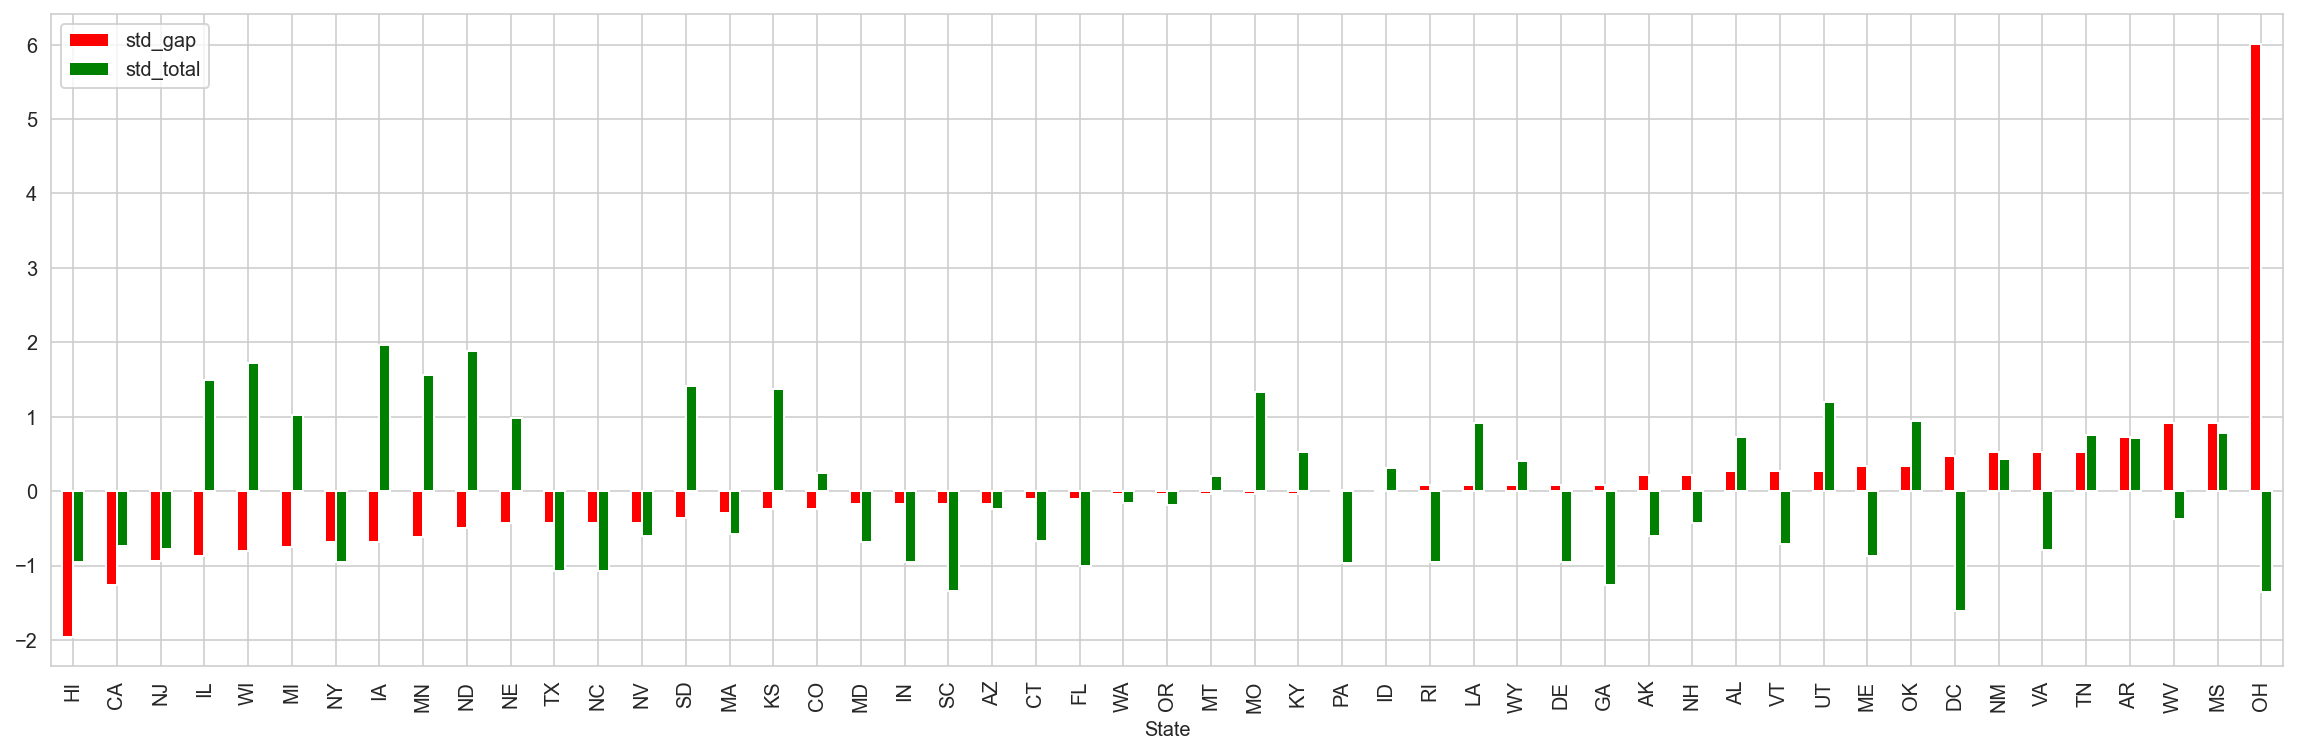

In [39]:
# plot total and gap on one chart

std_gap_total = pd.DataFrame(stats.zscore(sat_df[['Gap', 'Total']]), columns = ['std_gap','std_total'])
std_gap_total['State'] = sat_df['State']
std_gap_total = std_gap_total.sort_values('std_gap')
std_gap_total.plot(kind ='bar',x = 'State', figsize = (20,6), color = ['red','green']);

# does not show much pattern here 

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [40]:
v_greater_m = sat_df[sat_df['Gap'] > 0].sort_values(by = 'Gap', ascending=False).iloc[:10,:]
v_greater_m.head(3)

,State,Rate,Verbal,Math,Total,Gap
27,OH,26,534,439,973,95
29,WV,18,527,512,1039,15
50,MS,4,566,551,1117,15


In [41]:
m_greater_v = sat_df[sat_df['Gap'] < 0].sort_values(by = 'Gap', ascending=True).iloc[:10,:]
m_greater_v.head(3)

,State,Rate,Verbal,Math,Total,Gap
21,HI,52,485,515,1000,-30
23,CA,51,498,517,1015,-19
1,NJ,81,499,513,1012,-14


In [42]:
# Ohio has got the largest gap where Verbal score is much higher than Math
# Hawaii is the opposite with better Math score than Verbal. 

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [43]:
sat_df.corr()

,Rate,Verbal,Math,Total,Gap
Rate,1.000000,-0.888121,-0.773419,-0.849860,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.972453,0.044527
Math,-0.773419,0.899909,1.000000,0.976768,-0.395574
Total,-0.849860,0.972453,0.976768,1.000000,-0.189566
Gap,-0.098671,0.044527,-0.395574,-0.189566,1.000000


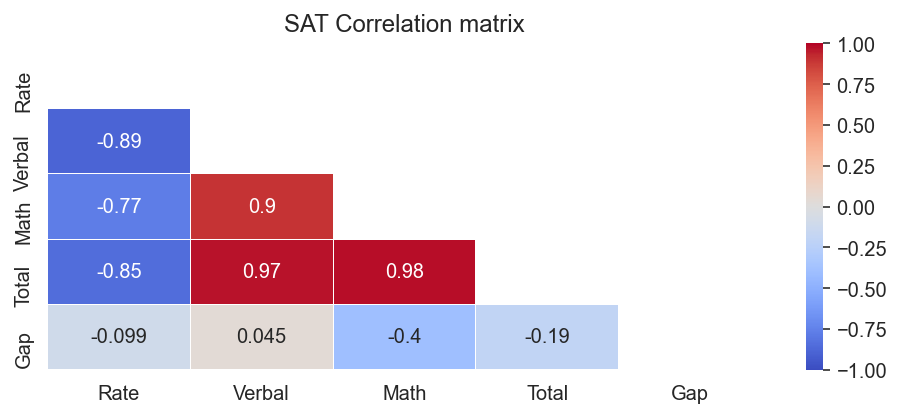

In [44]:
import matplotlib.pyplot as plt

mask = np.zeros_like(sat_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 3))
sns.heatmap(
    sat_df.corr(),
    cmap='coolwarm', #palette being used
    annot=True, #annotate each square
    mask=mask, #get rid of redundant info, need only one half of matrix
    vmin=-1.,
    vmax=1.,
    linewidths=.01
)
plt.title('SAT Correlation matrix');

In [45]:
# findings:
# 1. Verbal and Math score are strongly positively correlated in most states. 
# 2. Math is the main contributor making the total score difference.
# 3. The higher participation rate is, the lower total scores are... 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [46]:
sat_df.describe()

,Rate,Verbal,Math,Total,Gap
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,1064.372549,0.686275
std,27.550681,33.360667,36.287393,67.886069,15.839811
min,4.000000,482.000000,439.000000,956.000000,-30.000000
25%,9.000000,501.000000,503.000000,1003.000000,-6.000000
50%,33.000000,527.000000,525.000000,1048.000000,0.000000
75%,64.000000,562.000000,557.500000,1121.500000,4.500000
max,82.000000,593.000000,603.000000,1196.000000,95.000000


In [47]:
# count: total count of each variable
# mean: average of each variable
# std: standard deviation of each variable
# min: minimum in the variable range
# max: maximum in the variable range
# 25%: first quarter endpoint
# 50%: middle/center point
# 75%: 3rd quarter endpoint

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [48]:
# correlation is standardised covariance between 2 variables. 
# cov(x,y) = sum((x-x.mean()*(y-y.mean())/(len(x)-1)
# corr(x,y) = cov(x,y)/std(x)/std(y)

In [49]:
# correlation is standardised so it is easier to tell the weight of relationships in the same scale. 
# covariance only indicates the relationship between 2 variables rather than showing the whole picture among all the variables. 

In [50]:
sat_df.drop(columns = 'Total', inplace=True)

In [51]:

covs = []
for col1 in sat_df.drop(columns = 'State').columns:
    for col2 in sat_df.drop(columns = 'State').columns:
        c = sat_df[col1].cov(sat_df[col2])
        covs.append(c)

d = np.array(covs).reshape(4,4)
covariance_matrix = pd.DataFrame(index = sat_df.drop(columns = 'State').columns, 
                                 columns = sat_df.drop(columns = 'State').columns,
                                data = d)

In [52]:
covariance_matrix

,Rate,Verbal,Math,Gap
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Gap,-43.06,23.529412,-227.370196,250.899608


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.